$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\yv}{\mathbf{y}}
 \newcommand{\zv}{\mathbf{z}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Zm}{\mathbf{Z}}
 \newcommand{\Wm}{\mathbf{W}}
 \newcommand{\Ym}{\mathbf{Y}}
 \newcommand{\I}{\mathbf{I}}
 \newcommand{\muv}{\boldsymbol\mu}
 \newcommand{\Sigmav}{\boldsymbol\Sigma}
$



# Tensorflow 101

# Definitions and Terminology

- a library or a programming system that represents computation as a graph
- each node represents an operation, in short an **op**. 
- an op takes *tensors* as an input and produces tensors as an output
- **tensor**: The central unit of data 
- **rank**: the number of dimensios in a tensor

> rank 0: 3 <br/>
> rank 1: [1,2,3] <br/>
> rank 2: [[1,2],[2,3]] <br/>
> rank 3: [[[1,2,3],[2,3,4]],[[1,1,1],[2,2,2]]] <br/>
> ...
  

# Installation

https://www.tensorflow.org/install/

In [2]:
import tensorflow as tf

C:\Users\kiran\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
# Tools from text for consistant results

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "tensorflow"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [4]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = b"<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

# How to program in tensorflow

- First, **build** the computation graph
- Next, **run** the graph

- Simple!

# Example 

![](https://www.tensorflow.org/images/getting_started_add.png)

In [5]:
reset_graph()

node1 = tf.constant(3.0, dtype=tf.float32)
node2 = tf.constant(4.0) # also tf.float32 implicitly
print(node1, node2)

Tensor("Const:0", shape=(), dtype=float32) Tensor("Const_1:0", shape=(), dtype=float32)


In [6]:
# Create a session to create list output of the constant tensors
sess = tf.Session()
print(sess.run([node1, node2]))
sess.close()

[3.0, 4.0]


In [7]:
with tf.Session() as sess:
    op_add = tf.add(node1, node2)
    print(op_add)
    print(sess.run(op_add))


Tensor("Add:0", shape=(), dtype=float32)
7.0


# Tensorboard

- A tool for visualizing the graph and learning

In [8]:
show_graph(tf.get_default_graph())

# Input Variables

- Let us use **placeholder** for inputs. 


In [9]:
reset_graph()

sess = tf.Session()
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
op_add2 = a + b
print(sess.run(op_add2, {a: 3, b:4}))

7.0


In [10]:
print(sess.run(op_add2, {a: [3, 5, 6], b: 4}))
print(sess.run(op_add2, {a: [3, 5, 6], b: [-1, 10, 100]}))
sess.close()

[ 7.  9. 10.]
[  2.  15. 106.]


In [11]:
show_graph(tf.get_default_graph())

# Practice

- Can you implement this graph? 

$$
f(x, y) = x^2 y + y + 10
$$

In [12]:
# TO DO: finish this
reset_graph()
sess = tf.Session()
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
node2 = tf.constant(10.0)
xyfun = x**2 * y +y + node2
print(sess.run(xyfun, {x: 2, y:2}))


20.0


In [13]:
show_graph(tf.get_default_graph())

# Managing graphs

- any node or tensorflow is added to a graph automatically
- mostly one graph but possible with multiple graphs
- reset_default_graph(): useful in Jupyter notebook when multiple run created duplicate nodes

In [14]:
reset_graph()

x1 = tf.Variable(1)
x1.graph is tf.get_default_graph()

True

In [15]:
# use with structure to handle additional node

graph = tf.Graph()   # additional graph
with graph.as_default():
    x2 = tf.Variable(2)

x2.graph is graph

True

In [16]:
x2.graph is tf.get_default_graph()

False

# Running and Evaluation Nodes

- Session.run(): run a graph or a part of a graph
- Tensor.eval(): evaluate a node by using the session
  - t.eval() $\sim$ tf.get_default_session().run(t)

In [17]:
a = tf.constant(1)
a
with tf.Session() as s:
    print(a.eval())
    print(s.run(a))

1
1


In [18]:
# Multiple Evaluation Example

w = tf.constant(3)
x = w + 2
y = x + 5
z = x * 3

with tf.Session() as sess:
    print(y.eval())  # 10
    print(z.eval())  # 15

10
15


In [19]:
# Multiple Evaluation Example

w = tf.constant(3)
x = w + 2
y = x + 5
z = x * 3

def test1():
    with tf.Session() as sess:
        y_val = y.eval()  # 10
        z_val = z.eval()  # 15
    
%timeit test1()
print(y_val, z_val)

9.56 ms ± 688 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


NameError: name 'y_val' is not defined

In [20]:
# Evaluate once by running a graph

def test():
    with tf.Session() as sess:
        y_val, z_val = sess.run([y, z])
    
%timeit test()
print(y_val, z_val)

8.94 ms ± 1.17 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


NameError: name 'y_val' is not defined

In [21]:
# Variable usage

v = tf.Variable(5)
x = tf.Variable([1,2,3])
y = v * x 

# initialization
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    print(sess.run(y))

[ 5 10 15]


# Linear Regression

$$
\Ym = \Xm \Wm \\
\Wm = (\Xm^\top \Xm)^{-1} \Xm^\top \Tm
$$

In [22]:
import numpy as np
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
n, d = housing.data.shape
X1 = np.c_[np.ones((n, 1)), housing.data]  # concatenate to add a bias column


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd

X_T = np.c_[housing.data, housing.target]

df = pd.DataFrame(X_T)
df.describe()

df.columns = housing.feature_names + ['Avg. Value']

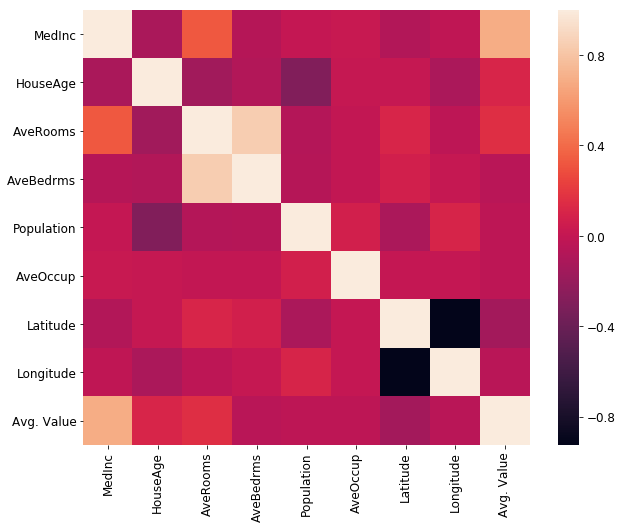

In [24]:
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr)

In [25]:
# Let's normalize the data first with Scikit.learn
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_housing_data = scaler.fit_transform(housing.data)
X1s = np.c_[np.ones((n, 1)), scaled_housing_data]

# Practice

- build a linear regression model with the analytical solution to find the weight $\Wm$
- use *matrix_inverse*, *matmul*, and *matrix_transpose*.

In [26]:
# for your reference, here follows our previous solution

T = housing.target.reshape(-1, 1)
w = np.linalg.lstsq(X1s.T @ X1s, X1s.T @ T)[0]

print(w)

print("mse: ", np.mean((X1s @ w - T)**2))

[[ 2.06855817]
 [ 0.8296193 ]
 [ 0.11875165]
 [-0.26552688]
 [ 0.30569623]
 [-0.004503  ]
 [-0.03932627]
 [-0.89988565]
 [-0.870541  ]]
mse:  0.5243209861846071


C:\Users\kiran\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


In [41]:
reset_graph()

sess=tf.Session()
# To Do: add your tensorflow code here
ww =  tf.matmul(tf.matrix_inverse(tf.matmul(tf.transpose(x1s),x1s)),tf.matmul(tf.transpose(x1s),ttt))
Xp = tf.placeholder("float")
Tp = tf.placeholder("float")
Wp = tf.placeholder("float")
axes = tf.placeholder("int32")
b = tf.Variable(np.random.rand(), name="bias")


weight = tf.matmul(tf.matrix_inverse(tf.matmul(tf.matrix_transpose(Xp),Xp)),tf.matmul(tf.matrix_transpose(Xp),Tp))
#print("mse: ", np.mean((X1s @ w - T)**2))
mse = tf.reduce_mean(tf.pow(tf.subtract(tf.tensordot(Xp, Wp,1),Tp),2))

W = sess.run(weight, {Xp: X1s,Tp: T})
print(W)
print("mse: ",sess.run(mse, {Xp: X1s,Wp: W,Tp: T}))
# sess.close()


[[ 2.0685585 ]
 [ 0.8296204 ]
 [ 0.1187522 ]
 [-0.26552767]
 [ 0.3056968 ]
 [-0.00450279]
 [-0.03932638]
 [-0.8998802 ]
 [-0.8705362 ]]
mse:  0.5243205


# Gradient Descent 



In [42]:
reset_graph()

n_epochs = 1000
learning_rate = 0.01

Xt = tf.constant(X1s, dtype=tf.float32)
Tt = tf.constant(T, dtype=tf.float32)
w = tf.Variable(tf.random_uniform([d + 1, 1], -1.0, 1.0, seed=42), name="w")


Yt = tf.matmul(Xt, w, name="predictions")
error = Yt - Tt
mse = tf.reduce_mean(tf.square(error), name="mse")
gradients = 2/n * tf.matmul(tf.transpose(Xt), error)
training_op = tf.assign(w, w - learning_rate * gradients)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        #print(w.eval())
        sess.run(training_op)
    
    best_w = w.eval()
print(best_w)

Epoch 0 MSE = 9.161543
Epoch 100 MSE = 0.7145007
Epoch 200 MSE = 0.5667047
Epoch 300 MSE = 0.5555716
Epoch 400 MSE = 0.5488116
Epoch 500 MSE = 0.54363626
Epoch 600 MSE = 0.53962916
Epoch 700 MSE = 0.53650916
Epoch 800 MSE = 0.5340678
Epoch 900 MSE = 0.53214705
[[ 2.0685525 ]
 [ 0.8874027 ]
 [ 0.14401658]
 [-0.34770882]
 [ 0.36178368]
 [ 0.00393812]
 [-0.04269557]
 [-0.6614528 ]
 [-0.63752776]]


# Autograd

In [43]:
reset_graph()

n_epochs = 1000
learning_rate = 0.01

Xt = tf.constant(X1s, dtype=tf.float32)
Tt = tf.constant(T, dtype=tf.float32)
w = tf.Variable(tf.random_uniform([d + 1, 1], -1.0, 1.0, seed=42), name="w")


Yt = tf.matmul(Xt, w, name="predictions")
error = Yt - Tt
mse = tf.reduce_mean(tf.square(error), name="mse")
##########gradients = 2/n * tf.matmul(tf.transpose(Xt), error)######## 
gradients = tf.gradients(mse, [w])[0]
######################################################################
training_op = tf.assign(w, w - learning_rate * gradients)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run() 
    
    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        #print(w.eval())
        sess.run(training_op)
    
    best_w = w.eval()
print(best_w)

Epoch 0 MSE = 9.161543
Epoch 100 MSE = 0.7145006
Epoch 200 MSE = 0.56670463
Epoch 300 MSE = 0.5555716
Epoch 400 MSE = 0.5488117
Epoch 500 MSE = 0.5436362
Epoch 600 MSE = 0.53962916
Epoch 700 MSE = 0.53650916
Epoch 800 MSE = 0.5340678
Epoch 900 MSE = 0.53214717
[[ 2.0685525 ]
 [ 0.8874027 ]
 [ 0.14401658]
 [-0.34770882]
 [ 0.36178368]
 [ 0.00393811]
 [-0.04269556]
 [-0.6614528 ]
 [-0.6375277 ]]


# Optimizer

In [44]:
reset_graph()

n_epochs = 1000
learning_rate = 0.01

Xt = tf.constant(X1s, dtype=tf.float32)
Tt = tf.constant(T, dtype=tf.float32)
w = tf.Variable(tf.random_uniform([d + 1, 1], -1.0, 1.0, seed=42), name="w")


Yt = tf.matmul(Xt, w, name="predictions")
error = Yt - Tt
mse = tf.reduce_mean(tf.square(error), name="mse")

##############################################################################
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)
##############################################################################

init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        sess.run(training_op)
    
    best_w = w.eval()
print(best_w)

Epoch 0 MSE = 9.161543
Epoch 100 MSE = 0.7145006
Epoch 200 MSE = 0.56670463
Epoch 300 MSE = 0.5555716
Epoch 400 MSE = 0.5488117
Epoch 500 MSE = 0.5436362
Epoch 600 MSE = 0.53962916
Epoch 700 MSE = 0.53650916
Epoch 800 MSE = 0.5340678
Epoch 900 MSE = 0.53214717
[[ 2.0685525 ]
 [ 0.8874027 ]
 [ 0.14401658]
 [-0.34770882]
 [ 0.36178368]
 [ 0.00393811]
 [-0.04269556]
 [-0.6614528 ]
 [-0.6375277 ]]


# Practice 

- Try another optimizer of your choice from  https://www.tensorflow.org/api_guides/python/train

In [45]:
reset_graph()

# To Do: Add your codes here

n_epochs = 1000
learning_rate = 0.01

Xt = tf.constant(X1s, dtype=tf.float32)
Tt = tf.constant(T, dtype=tf.float32)
w = tf.Variable(tf.random_uniform([d + 1, 1], -1.0, 1.0, seed=42), name="w")


Yt = tf.matmul(Xt, w, name="predictions")
error = Yt - Tt
mse = tf.reduce_mean(tf.square(error), name="mse")

##############################################################################
optimizer = tf.train.RMSPropOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)
##############################################################################

init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        sess.run(training_op)
    
    best_w = w.eval()
print(best_w)



Epoch 0 MSE = 9.161543
Epoch 100 MSE = 2.075607
Epoch 200 MSE = 0.62543994
Epoch 300 MSE = 0.52471405
Epoch 400 MSE = 0.52474296
Epoch 500 MSE = 0.5246838
Epoch 600 MSE = 0.524683
Epoch 700 MSE = 0.5246888
Epoch 800 MSE = 0.52468634
Epoch 900 MSE = 0.52468723
[[ 2.073558  ]
 [ 0.82457435]
 [ 0.12375329]
 [-0.27065474]
 [ 0.30055317]
 [-0.00941898]
 [-0.04427152]
 [-0.894995  ]
 [-0.87544906]]


# *making a prediction*

In [49]:
Xin = tf.placeholder(tf.float32, shape=(1, 9))
pred = tf.matmul(Xin, w)
# sess = tf.Session()
def predict(inp):
    inp = np.array(inp)
    if len(inp.shape) == 1:
        inp = inp.reshape((1, -1))
    x1 = np.c_[np.ones((inp.shape[0], 1)),  scaler.transform(inp)]
    y = sess.run(pred, {Xin: x1})
    return y

In [50]:
y = predict([8., 20., 7., 1., 500., 2., 37., -122.])
print(y)
sess.close()

FailedPreconditionError: Attempting to use uninitialized value w
	 [[Node: w/read = Identity[T=DT_FLOAT, _class=["loc:@w"], _device="/job:localhost/replica:0/task:0/device:CPU:0"](w)]]

Caused by op 'w/read', defined at:
  File "C:\Users\kiran\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\kiran\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\kiran\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\kiran\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\kiran\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\kiran\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\kiran\Anaconda3\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\Users\kiran\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\kiran\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\kiran\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\kiran\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\kiran\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\kiran\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\kiran\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\kiran\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\kiran\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\kiran\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\kiran\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\kiran\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\kiran\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-45-41b5d394bcb3>", line 10, in <module>
    w = tf.Variable(tf.random_uniform([d + 1, 1], -1.0, 1.0, seed=42), name="w")
  File "C:\Users\kiran\Anaconda3\lib\site-packages\tensorflow\python\ops\variables.py", line 213, in __init__
    constraint=constraint)
  File "C:\Users\kiran\Anaconda3\lib\site-packages\tensorflow\python\ops\variables.py", line 356, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "C:\Users\kiran\Anaconda3\lib\site-packages\tensorflow\python\ops\array_ops.py", line 125, in identity
    return gen_array_ops.identity(input, name=name)
  File "C:\Users\kiran\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 2070, in identity
    "Identity", input=input, name=name)
  File "C:\Users\kiran\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\kiran\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 2956, in create_op
    op_def=op_def)
  File "C:\Users\kiran\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value w
	 [[Node: w/read = Identity[T=DT_FLOAT, _class=["loc:@w"], _device="/job:localhost/replica:0/task:0/device:CPU:0"](w)]]


In [51]:
df[:5]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Avg. Value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Logging and Visualizing

In [52]:
reset_graph()

from datetime import datetime

now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)

In [53]:
n_epochs = 1000
learning_rate = 0.01

# add your tensorflow code here
Xt = tf.constant(X1s, dtype=tf.float32)
Tt = tf.constant(T, dtype=tf.float32)
w = tf.Variable(tf.random_uniform([d + 1, 1], -1.0, 1.0, seed=42), name="w")


Yt = tf.matmul(Xt, w, name="predictions")
error = Yt - Tt
mse = tf.reduce_mean(tf.square(error), name="mse")

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

##############################################################################
mse_summary = tf.summary.scalar('MSE', mse)
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())
##############################################################################

with tf.Session() as sess:
    init.run()

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
            summary_str = mse_summary.eval(feed_dict={Xt: X1s, Tt: T})
            file_writer.add_summary(summary_str, epoch)
        sess.run(training_op)
    
    best_w = w.eval()
print(best_w)

Epoch 0 MSE = 9.161543
Epoch 100 MSE = 0.7145006
Epoch 200 MSE = 0.56670463
Epoch 300 MSE = 0.5555716
Epoch 400 MSE = 0.5488117
Epoch 500 MSE = 0.5436362
Epoch 600 MSE = 0.53962916
Epoch 700 MSE = 0.53650916
Epoch 800 MSE = 0.5340678
Epoch 900 MSE = 0.53214717
[[ 2.0685525 ]
 [ 0.8874027 ]
 [ 0.14401658]
 [-0.34770882]
 [ 0.36178368]
 [ 0.00393811]
 [-0.04269556]
 [-0.6614528 ]
 [-0.6375277 ]]


In [54]:
file_writer.close()

In [ ]:
!tensorboard --logdir tf_logs/